<center>
    <h1>進階 Python</h1>
    <h3>用 Python 簡單打造一個屬於自己的投資分析 App</h3>
    <h3>Part II - Python 資料分析工具</h3>
</center>


<h2>目錄</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>
            Pandas
            <ul>
                <li>DataFrame 是什麼？</li>
                <li>折線圖</li>
                <li>直條圖</li>
            </ul>
        </li>
     </ul>
    <ul>
        <li>
            matplotlib 繪圖套件
            <ul>
                <li>折線圖</li>
                <li>直條圖</li>
            </ul>
        </li>
     </ul>
     <ul>
        <li>
        實作
        <ul>
        <li>歷年股價製圖（已校正，可當作回測線）</li>
        <li>年度報酬率製圖</li>
    </li>
         </ul>
    
</div>

我們會直接用實作來當作範例，此部分不會講的像前面爬蟲那樣詳細。重點是要給同學一個概念而已。如果想要深入瞭解的話，皆有許多資源可以參考。

<hr>

在進入本章節之前，大家要知道，用 Python 做資料分析遠比上面單純所提到的畫圖還要來得多。在這邊我們就簡單介紹一下待會做 App 會用到的畫圖方式以及技巧。如果還有興趣的同學，也可以參考其他書籍或網路相關文章。

事實上，系上的統計課，正式在教大家如何以 Python 做統計分析，裡頭也有很多製圖或是分析相關工具的介紹。我在這邊有將系上教材整理成網頁版，有興趣的同學也可以參考一下唷！

In [1]:
from bs4 import BeautifulSoup
import time
from datetime import datetime
import requests 
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import pws

# 在 Jupyter Notebook 中，只要有加上下面這行，就可以直接在裡面畫圖
%matplotlib inline

剛剛我們所介紹的爬蟲工具，其實有些善心人士有幫我們寫好了，我們這時只要 import 他們所建構的套件即可。

以下，我們就示範一下利用 `yfinance` 套件，快速將資料下載下來的例子。這麼一來，我們便不用再辛苦地去瀏覽網站找閱資料了。

In [2]:
stock_id = '0050.TW'
stock_obj = yf.Ticker(stock_id)
stock_df = stock_obj.history(start='2011-3-12', end='2021-3-12', auto_adjust=False)
type(stock_df)

pandas.core.frame.DataFrame

`yfinance` 也可以幫助我們取得「即時」的股價：

In [18]:
# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
real_time_data = stock_obj.history(period='1d', interval='1m', auto_adjust=False).sort_index(ascending=False).head(1)
real_time_data

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,,
2021-12-17 13:24:00+08:00,141.75,141.850006,141.75,141.850006,141.850006,27311,0,0


如果查詢開盤中且 13:25 以前的價格，我們都可以透過以上方式取得即時價格。但一但超過 13:25 的話，就要記得用當天的收盤價格。我們等等會跟大家解釋要怎麼取出這個資訊。

我們直接就拿上面 `stock_df` 來介紹 `DataFrame` 吧。這是一個來自於另一個套件，`pandas`，的實用 data type。它的功能有點像 Excel。我們來看看以下的例子：

In [10]:
# 呈現 DataFrame
display(stock_df)
stock_df.to_excel('data/0050.xlsx', engine='xlsxwriter')

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2011-03-14,58.599998,58.900002,57.650002,58.799999,58.799999,27988,0,0
2011-03-15,58.700001,58.700001,55.599998,57.500000,57.500000,61987,0,0
2011-03-16,58.000000,58.049999,57.250000,57.299999,57.299999,20870,0,0
2011-03-17,56.799999,57.299999,56.500000,57.299999,57.299999,20301,0,0
2011-03-18,57.700001,57.799999,57.349998,57.750000,57.750000,13021,0,0
...,...,...,...,...,...,...,...,...
2021-03-05,130.050003,132.600006,129.500000,131.949997,131.949997,14153461,0,0
2021-03-08,133.750000,133.800003,131.500000,131.850006,131.850006,12052602,0,0
2021-03-09,130.550003,131.600006,129.750000,131.350006,131.350006,13273932,0,0


In [4]:
display(stock_df.head())
display(stock_df.tail())

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2011-03-14,58.599998,58.900002,57.650002,58.799999,58.799999,27988,0,0
2011-03-15,58.700001,58.700001,55.599998,57.500000,57.500000,61987,0,0
2011-03-16,58.000000,58.049999,57.250000,57.299999,57.299999,20870,0,0
2011-03-17,56.799999,57.299999,56.500000,57.299999,57.299999,20301,0,0
2011-03-18,57.700001,57.799999,57.349998,57.750000,57.750000,13021,0,0


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2021-03-05,130.050003,132.600006,129.500000,131.949997,131.949997,14153461,0,0
2021-03-08,133.750000,133.800003,131.500000,131.850006,131.850006,12052602,0,0
2021-03-09,130.550003,131.600006,129.750000,131.350006,131.350006,13273932,0,0
2021-03-10,132.300003,132.600006,131.399994,131.899994,131.899994,5338478,0,0
2021-03-11,132.050003,134.949997,132.050003,134.699997,134.699997,9165793,0,0


那又要怎麼取得特定格子的資料呢？

`DataFrame.iloc` 是使用 index 位置來取我們要的資料。在基礎 Python 有提過 index 起始值為 0，在這邊我們要取剛剛 `real_time_data` 第一行第一列的資料：

In [19]:
display(real_time_data)
price = real_time_data.iloc[0, 0]
print(price)

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,,
2021-12-17 13:24:00+08:00,141.75,141.850006,141.75,141.850006,141.850006,27311,0,0


141.75


順帶一提，等等會提到如何取得該檔股票的詳細資訊，先劇透一下，我們也可以透過以下方式來取得最新股價：

In [20]:
stock_obj.info['regularMarketPrice']

141.9

Pandas 官網也有提供非常好的 10 分鐘教學，有興趣的同學不妨自己前去試試看：<https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html>

### Pandas 製圖

同學要知道，除了 `pandas`, `matplotlib` 以外，還有如 `plotly`, `seaborn` 等的製圖套件，可以讓我們畫出來的圖更好看。

折線圖：

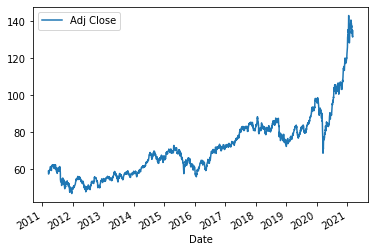

In [31]:
stock_df[['Adj Close']].plot()
plt.show()

直條圖：

In [27]:
stock_df['Volume'][-100:]

Date
2020-10-12     9837999
2020-10-13     5410614
2020-10-14     2562860
2020-10-15     4550154
2020-10-16     3239005
                ...   
2021-03-05    14153461
2021-03-08    12052602
2021-03-09    13273932
2021-03-10     5338478
2021-03-11     9165793
Name: Volume, Length: 100, dtype: int64

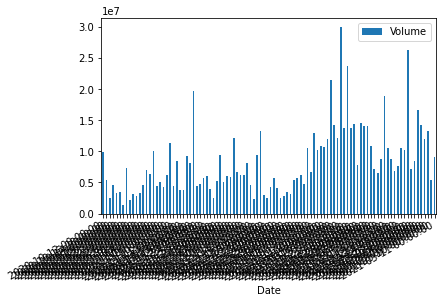

In [33]:
stock_df[['Volume']][-100:].plot(kind='bar')
plt.gcf().autofmt_xdate()
plt.show()

寫程式就是不斷地從別人的經驗中吸取教訓，所以像上述問題無法解決時，就要去找資料。

<https://stackoverflow.com/a/30135182/10871988>

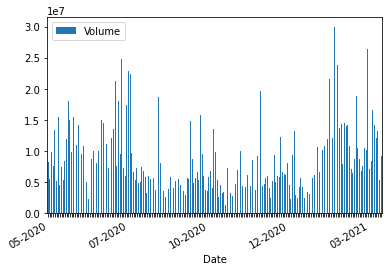

In [67]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

ax = stock_df[['Volume']][-200:].plot(kind='bar')

# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = ['']*len(stock_df.iloc[-200:,].index)
# Every 4th ticklable shows the month and day
# ticklabels[::4] = [item.strftime('%b %d') for item in stock_df.index[::4]]
# Every 12th ticklabel includes the year
ticklabels[::48] = [item.strftime('%m-%Y') for item in stock_df.iloc[-200:,].index[::48]]

ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()

plt.show()

In [56]:
volume_df = stock_df.resample('MS')['Volume'].sum()
volume_df.tail()

Date
2020-11-01    140588709
2020-12-01    128439831
2021-01-01    264577521
2021-02-01    147094531
2021-03-01     86077193
Freq: MS, Name: Volume, dtype: int64

In [59]:
len(volume_df)

121

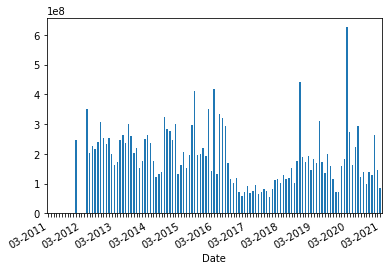

In [68]:
# fig, ax = plt.subplots()
ax = volume_df.plot(kind='bar')

# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = ['']*len(volume_df.index)
# Every 4th ticklable shows the month and day
# ticklabels[::4] = [item.strftime('%b %d') for item in stock_df.index[::4]]
# Every 12th ticklabel includes the year
ticklabels[::12] = [item.strftime('%m-%Y') for item in volume_df.index[::12]]

ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()

plt.show()

In [61]:
volume_df.index[::48]

DatetimeIndex(['2011-03-01', '2015-03-01', '2019-03-01'], dtype='datetime64[ns]', name='Date', freq='48MS')

#### 股市分析 DataFrame 實用函式（部分）

+ ffill: [reference](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ffill.html) | 用來補足前一個欄位的空缺
+ describe: 用來「解釋」該 DataFrame
+ pct_change: [reference](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html) | 用來計算每一格的趴數變化

當然還有很多各式各樣的函式，各位可以參照 Pandas Document 裡頭的資料摸索一陣，或是可以上網下正確的關鍵字即可。多數問題都已經有被神通廣大的網友解決了。


In [15]:
stock_monthly_returns = stock_df['Adj Close'].resample('M').ffill().pct_change() * 100
stock_monthly_returns

Date
2011-03-31          NaN
2011-04-30     4.114191
2011-05-31     0.000000
2011-06-30    -5.080648
2011-07-31     1.784202
                ...    
2020-11-30    10.000003
2020-12-31     7.899379
2021-01-31     4.867073
2021-02-28     4.056160
2021-03-31     0.974515
Freq: M, Name: Adj Close, Length: 121, dtype: float64

In [16]:
stock_yearly_returns = stock_df['Adj Close'].resample('Y').ffill().pct_change() * 100

stock_yearly_returns.index = stock_yearly_returns.index.strftime('%Y') #將 index 的 dateformat 改成‘年’

stock_daily_return = stock_df['Adj Close'].ffill().pct_change()

還記得剛剛所建立的 `stock_obj` 嗎？其實我們可以從中獲得許多資訊，包括我們前一節所提到的爬蟲資訊。

In [18]:
stock_obj.info

{'previousClose': 136.95,
 'regularMarketOpen': 138.15,
 'twoHundredDayAverage': 126.864586,
 'trailingAnnualDividendYield': None,
 'payoutRatio': None,
 'volume24Hr': None,
 'regularMarketDayHigh': 139.45,
 'navPrice': 140.66,
 'averageDailyVolume10Day': 7880764,
 'totalAssets': 131650002944,
 'regularMarketPreviousClose': 136.95,
 'fiftyDayAverage': 137.05139,
 'trailingAnnualDividendRate': None,
 'open': 138.15,
 'toCurrency': None,
 'averageVolume10days': 7880764,
 'expireDate': None,
 'yield': 0.0279,
 'algorithm': None,
 'dividendRate': None,
 'exDividendDate': None,
 'beta': None,
 'circulatingSupply': None,
 'startDate': None,
 'regularMarketDayLow': 137.95,
 'priceHint': 2,
 'currency': 'TWD',
 'regularMarketVolume': 7056550,
 'lastMarket': None,
 'maxSupply': None,
 'openInterest': None,
 'marketCap': None,
 'volumeAllCurrencies': None,
 'strikePrice': None,
 'averageVolume': 8404915,
 'priceToSalesTrailing12Months': None,
 'dayLow': 137.95,
 'ask': 139.4,
 'ytdReturn': None,

In [19]:
stock_obj.info['longName']

'Yuanta/P-shares Taiwan Top 50 ETF'

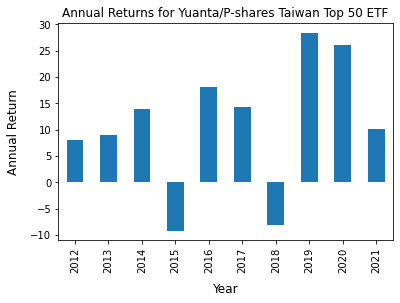

In [95]:
stock_yearly_returns.dropna().plot(kind='bar')
plt.xlabel('Year', fontsize="large", labelpad=10)
plt.ylabel('Annual Return', fontsize="large", labelpad=10)
plt.title(f'Annual Returns for {stock_obj.info["longName"]}')
plt.show()

前面我們不是有實作一個殖利率的函式嗎？其實也可以透過以下方式獲得，需要注意的是，這不見得會每次都正確。像 0050 的資料就不齊全：

In [ ]:
print(stock_obj.info['dividendRate'])
stock_obj.dividends

#

## matplotlib

剛剛直接用 `DataFrame.plot()` 的方式製圖，其實背後都是使用到 matplotlib 套件。之後在做更複雜的分析時，我們會發現有時候單用 DataFrame 製圖會比較沒效率。

那我們就再示範一次折線圖以及直條圖的畫法：

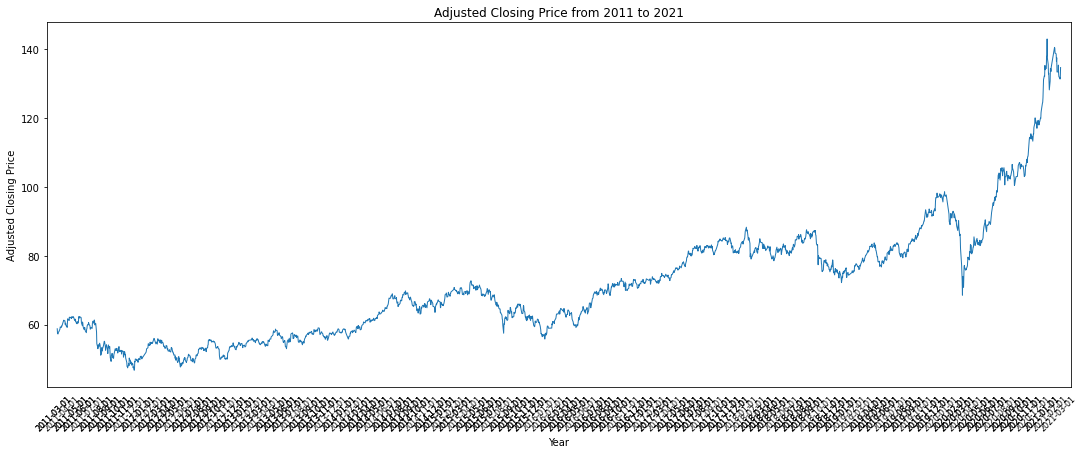

In [20]:
# stock_df[['Adj Close']].plot()

n = stock_df[['Adj Close']].shape[0]
year = stock_df.index.strftime('%Y-%m')

fig, ax = plt.subplots(figsize=(15,6))
plt.plot(stock_df.index, stock_df['Adj Close'], '-', linewidth=1, markersize=5)
plt.xticks(year, rotation=45, fontsize=8)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False)         # ticks along the top edge are off

plt.margins(x=.01, tight=False)

fig.tight_layout()
ax.set_xticks(ax.get_xticks()[::12]) # show the data of the first month for each year
plt.xlabel('Year')
plt.ylabel('Adjusted Closing Price')
plt.title(f'Adjusted Closing Price from {stock_df.index[0].strftime("%Y")} to {stock_df.index[-1].strftime("%Y")}')
plt.show()

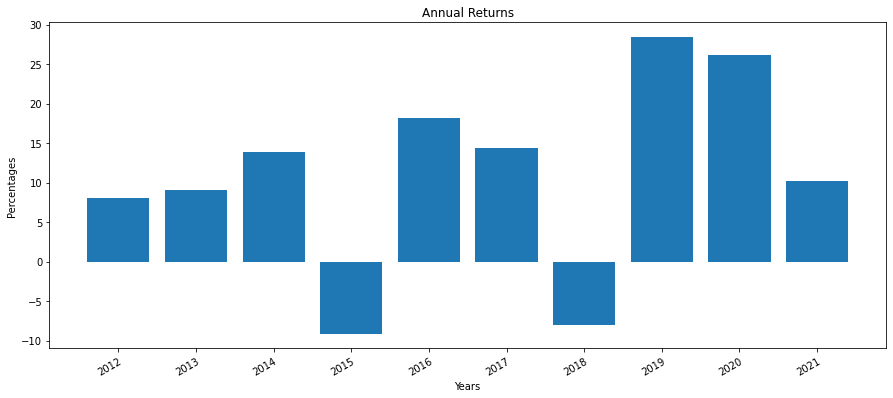

In [117]:
fig, ax = plt.subplots(figsize=(15,6))

rect = ax.bar(stock_yearly_returns.dropna().index, stock_yearly_returns.dropna().values, width=0.8, bottom=None, align='center')

ax.set_title("Annual Returns")
ax.set_xlabel("Years")
ax.set_ylabel("Percentages")
plt.setp(ax.get_xticklabels(), rotation=30, ha="right",rotation_mode="anchor")

plt.show()

大概是醬！如果待會兒實作有什麼想法，但畫不出來，也不確定如何下關鍵字的話，歡迎提出來一起討論。